# PCA - MNIST

En éste ejercicio vamos a aplicar PCA y K-means al digits dataset similar a MNIST, que incluye imágenes de dígitos de 8x8 píxeles. La idea es intentar recopilar información sobre la distribución de las imágenes, usando visualizaciones que permitan clarificar cómo interpretar los resultados obtenidos por PCA.

### Importamos librerías

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import os
import gzip
import sys
import pandas as pd
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import normalize 
from sklearn.datasets import load_digits

In [2]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### Importamos el dataset

In [3]:
# Cargamos los datos de training
X, y = load_digits(return_X_y=True)
print('Formato del dataset: {}'.format(X.shape))

Formato del dataset: (1797, 64)


In [4]:
print('Formato de las etiquetas: {}'.format(y.shape))

Formato de las etiquetas: (1797,)


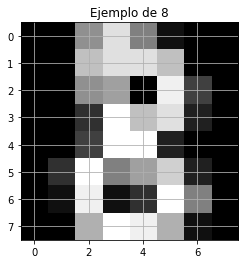

In [5]:
# Cargamos una muestra
plt.grid(True)
plt.title("Ejemplo de {}".format(y[8]))
plt.imshow(X[8, :].reshape((8, 8)), cmap='gray')

## Consignas

Siguiendo los ejemplos vistos en clase sobre los datasets de Human Activity Recognition y Fashion MNIST, realizar las siguientes consignas:

1. Aplicar PCA sobre el dataset para poder explicar el 90% de la varianza. ¿Cuántos componentes se requieren?
2. Graficar un scree plot (varianza contemplada en función del número de componentes considerados)
3. Visualizar gráficamente los primeros 5 componentes ¿Qué conclusiones se puede sacar de cada componente? [OPCIONAL].
4. Visualizar la imagen original vs. la reconstruida con los $m$ componentes del punto 1.
5. Graficar una matriz de correlación del dataset reducido.
6. Graficar los clusters de dígitos en 2 y 3 dimensiones usando los componentes obtenidos en PCA.
7. Aplicar K-means para clusterizar los dígitos ¿Cómo son los resultados?
8. Realizar un gráfico de inercia para obtener el número óptimo de clusters $k$.
9. Analizar visualmente los límites del cluster de algún dígito y "generar" artificialmente el dígito dándole valores a los primeros dos componentes de PCA.

# 1) Aplicar PCA sobre el dataset para poder explicar el 90% de la varianza. ¿Cuántos componentes se requieren?

In [12]:
X_normalized = normalize(X)

PCAModel = PCA(n_components= 0.9)
X_norm_r = PCAModel.fit_transform(X_normalized)

In [13]:
pca_ratio = PCAModel.explained_variance_ratio_

In [14]:
print("RESPUESTA: se requieren {} componentes".format(len(PCAModel.explained_variance_ratio_)))

RESPUESTA: se requieren 21 componentes


# Graficar un scree plot (varianza contemplada en función del número de componentes considerados)

Text(0, 0.5, 'varianza acumulada')

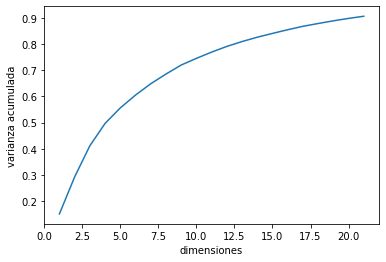

In [15]:
plt.plot(range(1,len(pca_ratio)+1), np.cumsum(pca_ratio))
plt.xlabel("dimensiones")
plt.ylabel("varianza acumulada")

# Visualizar gráficamente los primeros 5 componentes ¿Qué conclusiones se puede sacar de cada componente? [OPCIONAL].

Text(0, 0.5, 'varianza acumulada')

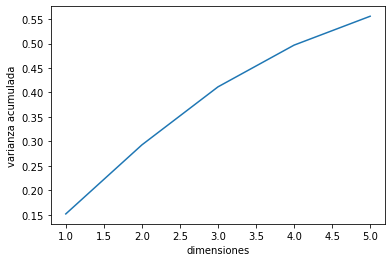

In [16]:
plt.plot(range(1,len(pca_ratio[:5])+1), np.cumsum(pca_ratio[:5]))
plt.xlabel("dimensiones")
plt.ylabel("varianza acumulada")

In [17]:
print("con 5 componentes queda 55% de la variable")

con 5 componentes queda 55% de la variable


# Visualizar la imagen original vs. la reconstruida con los  𝑚 m componentes del punto 1.

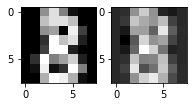

In [41]:
plt.figure(figsize=(16,16))
original_image = X[8].reshape(8,8)
plt.subplot(2, 10, 1)
plt.imshow(original_image, cmap='gray')

predicted = PCAModel.inverse_transform(X_norm_r)[0].reshape(8,8)
plt.subplot(2, 10, 2)
plt.imshow(predicted, cmap='gray')

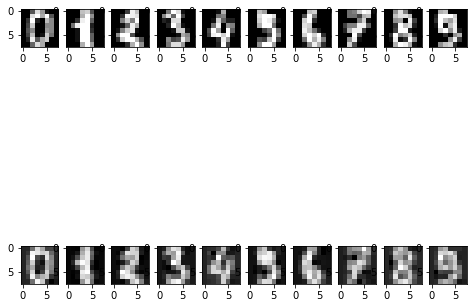

In [56]:
plt.figure(figsize=(8,8))
for i in range(10):
    original_image = X[i].reshape(8,8)
    plt.subplot(2, 10, i+1)
    plt.imshow(original_image, cmap='gray')

    predicted = PCAModel.inverse_transform(X_norm_r)[i].reshape(8,8)
    plt.subplot(2, 10, i+11)
    plt.imshow(predicted, cmap='gray')

# Graficar una matriz de correlación del dataset reducido.

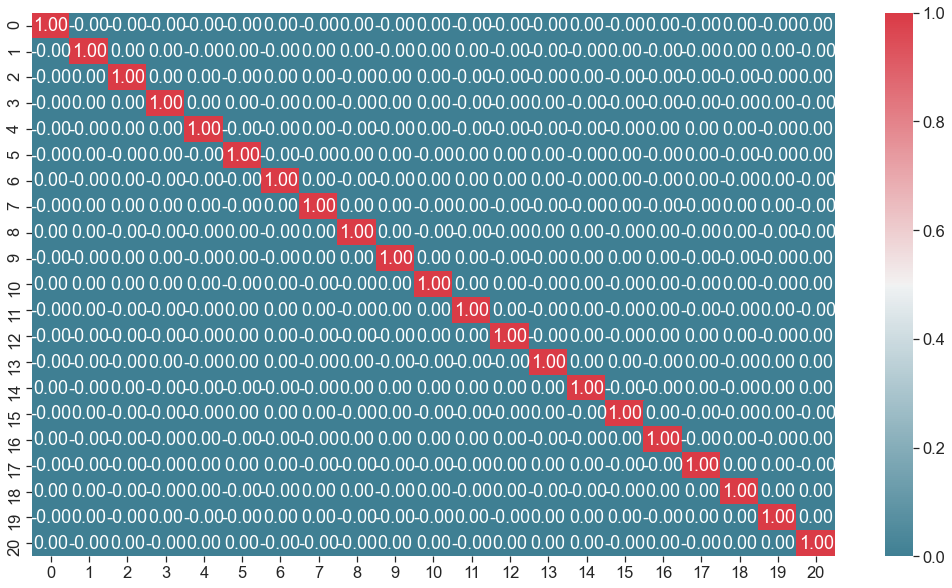

In [135]:
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)

ds_reducido = pd.DataFrame(X_norm_r)
corr = ds_reducido.corr()
fig, ax1 = plt.subplots(1, figsize=(18, 10))
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f")
sns.set(font_scale=1.5)

# Graficar los clusters de dígitos en 2 y 3 dimensiones usando los componentes obtenidos en PCA.

Text(0.5, 1.0, 'MNIST - PCA projection 2D')

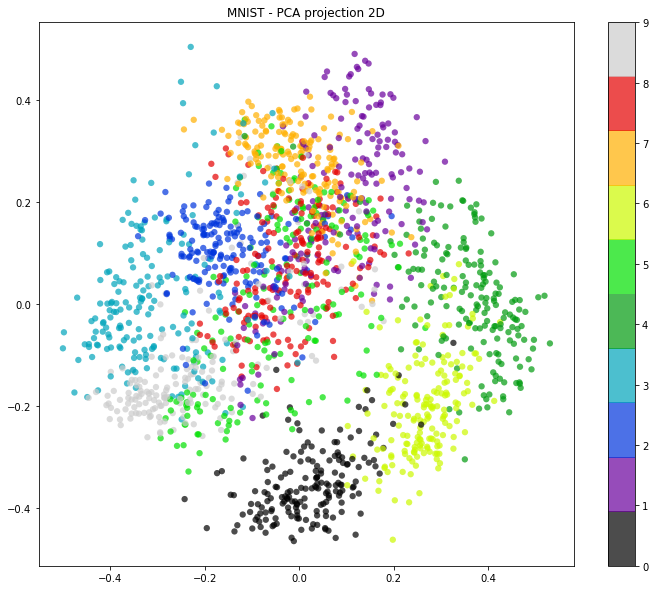

In [64]:
plt.figure(figsize=(12,10))
plt.scatter(X_norm_r[:, 0], X_norm_r[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST - PCA projection 2D')

Text(0.5, 0.92, 'MNIST - PCA projection 3D')

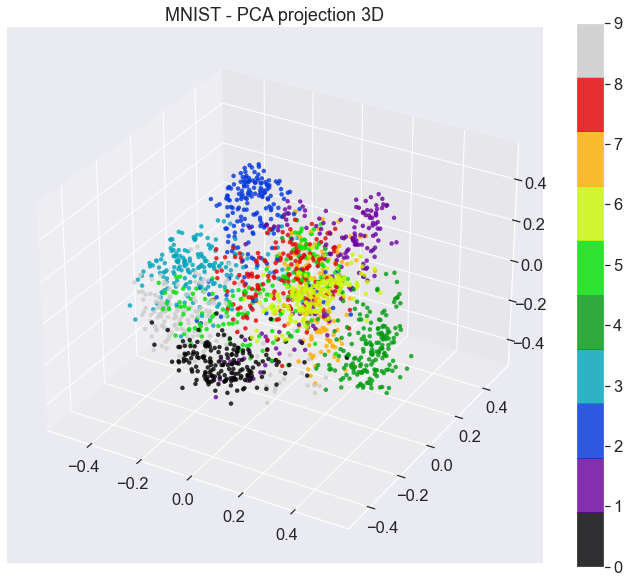

In [152]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection ="3d")
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
graph = ax.scatter(X_norm_r[:, 0], X_norm_r[:, 1], X_norm_r[:, 2], 
            c=y, 
            edgecolor='none', alpha=0.8, 
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
fig.colorbar(graph ,ax = ax)
plt.title('MNIST - PCA projection 3D')

# Aplicar K-means para clusterizar los dígitos ¿Cómo son los resultados?

In [114]:
from sklearn.cluster import KMeans

n_digits = len(np.unique(y))
print(n_digits)

10


In [115]:
kmeans = KMeans(n_clusters=n_digits)
kmeans.fit(X)

KMeans(n_clusters=10)

In [122]:
len(kmeans.labels_)

1797

In [123]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    # Loop through the clusters
    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [124]:
cluster_labels = infer_cluster_labels(kmeans, y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)

Text(0.5, 1.0, 'MNIST - Kmeans projection 2D')

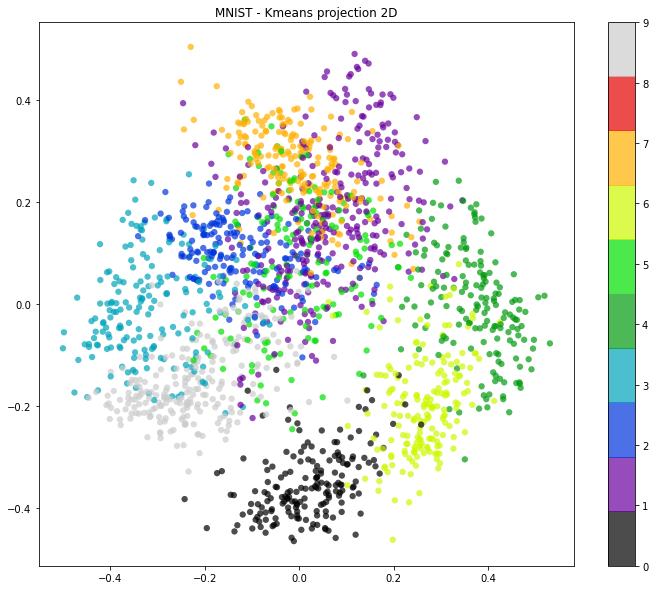

In [125]:
plt.figure(figsize=(12,10))
plt.scatter(X_norm_r[:, 0], X_norm_r[:, 1], c=predicted_labels, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST - Kmeans projection 2D')

# Realizar un gráfico de inercia para obtener el número óptimo de clusters  𝑘

In [133]:
# Vemos la inercia (suma de las distancias de los miembros de un cluster a su centroide)
inertia = []
n_digits = 20
for k in range(1, n_digits + 1):
    kmeans = KMeans(n_clusters=k).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

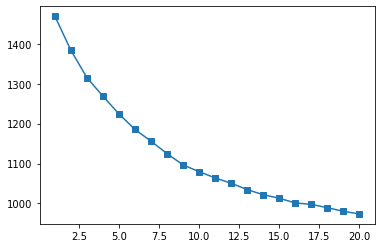

In [134]:
plt.plot(range(1, n_digits + 1), inertia, marker='s')

# Analizar visualmente los límites del cluster de algún dígito y "generar" artificialmente el dígito dándole valores a los primeros dos componentes de PCA.

In [ ]:

plt.figure(figsize=(12,10))
plt.scatter(X_norm_r[:, 0], X_norm_r[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST - PCA projection 2D')